In [3]:
#from osgeo import ogr
#import gdal
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raster = gdal.Open("E://Final Year//images//composite_bands.tif")

In [3]:
print (raster.GetMetadata())

{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}


In [4]:
num_bands = raster.RasterCount
print('Number of bands in image: {n}\n'.format(n=num_bands))

Number of bands in image: 4



In [5]:
rows = raster.RasterYSize
cols = raster.RasterXSize
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

Image size is: 496 rows x 652 columns



In [6]:
desc = raster.GetDescription()
metadata = raster.GetMetadata()

print('Raster description: {desc}'.format(desc=desc))
print('Raster metadata:')
print(metadata)
print('\n')

Raster description: E://Final Year//images//composite_bands.tif
Raster metadata:
{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}




In [7]:
driver = raster.GetDriver()
print('Raster driver: {d}\n'.format(d=driver.ShortName))

Raster driver: GTiff



In [8]:
proj = raster.GetProjection()
print('Image projection:')
print(proj + '\n')

Image projection:
PROJCS["WGS_1984_UTM_Zone_43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AUTHORITY["EPSG","32643"]]



In [9]:
gt = raster.GetGeoTransform()
print('Image geo-transform: {gt}\n'.format(gt=gt))

Image geo-transform: (311955.0, 30.0, 0.0, 3738765.0, 0.0, -30.0)



In [11]:
blue = raster.GetRasterBand(1)

print(blue)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x00000224C9DBA780> >


In [13]:
datatype = blue.DataType
print('Band datatype: {dt}'.format(dt=blue.DataType))

Band datatype: 4


In [14]:
datatype_name = gdal.GetDataTypeName(blue.DataType)
print('Band datatype: {dt}'.format(dt=datatype_name))

Band datatype: UInt32


In [15]:
bytes = gdal.GetDataTypeSize(blue.DataType)
print('Band datatype size: {b} bytes\n'.format(b=bytes))

Band datatype size: 32 bytes



In [16]:
band_max, band_min, band_mean, band_stddev = blue.GetStatistics(0, 1)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band range: 20881.0 - 7782.0
Band mean, stddev: 9904.6534546307, 1106.2060961733



In [17]:
blue_data = blue.ReadAsArray()

print(blue_data)
print()
print('Blue band mean is: {m}'.format(m=blue_data.mean()))
print('Size is: {sz}'.format(sz=blue_data.shape))

[[ 8752  8897 10454 ...  8711  8708  8689]
 [ 8799  8899  9985 ...  8737  8767  8708]
 [ 8811  8930  9197 ...  8737  8765  8701]
 ...
 [11226 11832 11719 ...  9630  9833  9968]
 [11645 12177 12011 ... 10245 10731 10816]
 [11272 11284 11716 ... 11186 11101 11197]]

Blue band mean is: 9904.653454630912
Size is: (496, 652)


In [18]:
# Initialize a 3d array -- use the size properties of our image for portability!
image = np.zeros((raster.RasterYSize, raster.RasterXSize, raster.RasterCount))

# Loop over all bands in dataset
for b in range(raster.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = raster.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

print(image)
print(image.dtype)

[[[ 8752. 15817.  9641. 65536.]
  [ 8897. 15103.  9678. 65536.]
  [10454. 16095. 10632. 65536.]
  ...
  [ 8711. 17946.  9744. 65536.]
  [ 8708. 17375.  9721. 65536.]
  [ 8689. 17668.  9715. 65536.]]

 [[ 8799. 15665.  9659. 65536.]
  [ 8899. 15253.  9702. 65536.]
  [ 9985. 15798. 10313. 65536.]
  ...
  [ 8737. 17365.  9742. 65536.]
  [ 8767. 16997.  9752. 65536.]
  [ 8708. 18010.  9769. 65536.]]

 [[ 8811. 15457.  9634. 65536.]
  [ 8930. 15282.  9697. 65536.]
  [ 9197. 15105.  9858. 65536.]
  ...
  [ 8737. 18153.  9778. 65536.]
  [ 8765. 17968.  9794. 65536.]
  [ 8701. 18284.  9754. 65536.]]

 ...

 [[11226. 14986. 11157. 65536.]
  [11832. 14705. 11585. 65536.]
  [11719. 15165. 11515. 65536.]
  ...
  [ 9630. 18749. 10286. 65536.]
  [ 9833. 18375. 10418. 65536.]
  [ 9968. 17459. 10448. 65536.]]

 [[11645. 15052. 11467. 65536.]
  [12177. 15371. 11845. 65536.]
  [12011. 15348. 11616. 65536.]
  ...
  [10245. 17189. 10605. 65536.]
  [10731. 16753. 10790. 65536.]
  [10816. 16041. 10829. 6553

In [19]:
raster.GetRasterBand(1).DataType


4

In [20]:

from osgeo import gdal_array

# DataType is a property of the individual raster bands
image_datatype = raster.GetRasterBand(1).DataType

# Allocate our array, but in a more efficient way
image_correct = np.zeros((raster.RasterYSize, raster.RasterXSize, raster.RasterCount),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype))

# Loop over all bands in dataset
for b in range(raster.RasterCount):
    # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = raster.GetRasterBand(b + 1)
    
    # Read in the band's data into the third dimension of our array
    image_correct[:, :, b] = band.ReadAsArray()

print("Compare datatypes: ")
print("    when unspecified: {dt}".format(dt=image.dtype))
print("    when specified: {dt}".format(dt=image_correct.dtype))
print('Red band mean: {r}'.format(r=image[:, :, 2].mean()))
print('NIR band mean: {nir}'.format(nir=image[:, :, 3].mean()))

Compare datatypes: 
    when unspecified: float64
    when specified: uint32
Red band mean: 10396.610358326736
NIR band mean: 20726.81738880368


In [21]:
b_red = 2
b_nir = 3

ndvi = (image[:, :, b_nir] - image[:, :, b_red]) / (image[:, :, b_red] + image[:, :, b_nir])

print(ndvi)
print('Maximum value of NDVI = {ndvi} '.format(ndvi=ndvi.max()) )

[[0.74351198 0.74265429 0.72082764 ... 0.74112646 0.74165858 0.74179745]
 [0.74309462 0.74209841 0.72806497 ... 0.74117272 0.74094145 0.74054844]
 [0.74367434 0.74221419 0.73849378 ... 0.74034044 0.7399708  0.74089521]
 ...
 [0.70904776 0.69956302 0.70110706 ... 0.72868033 0.72567607 0.72499474]
 [0.70216745 0.6938525  0.69888013 ... 0.72143786 0.71726541 0.7163884 ]
 [0.70737807 0.7082459  0.70349479 ... 0.70851311 0.7104305  0.70717793]]
Maximum value of NDVI = 0.7641390077794826 


In [22]:
ndvi = (image[:, :, b_nir] - image[:, :, b_red]) / \
        (image[:, :, b_nir] + image[:, :, b_red]).astype(np.float64)

print('NDVI matrix: ')
print(ndvi)

print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

NDVI matrix: 
[[0.74351198 0.74265429 0.72082764 ... 0.74112646 0.74165858 0.74179745]
 [0.74309462 0.74209841 0.72806497 ... 0.74117272 0.74094145 0.74054844]
 [0.74367434 0.74221419 0.73849378 ... 0.74034044 0.7399708  0.74089521]
 ...
 [0.70904776 0.69956302 0.70110706 ... 0.72868033 0.72567607 0.72499474]
 [0.70216745 0.6938525  0.69888013 ... 0.72143786 0.71726541 0.7163884 ]
 [0.70737807 0.7082459  0.70349479 ... 0.70851311 0.7104305  0.70717793]]

Max NDVI: 0.7641390077794826
Mean NDVI: 0.15482939319683586
Median NDVI: 0.03503760830238979
Min NDVI: -0.08215587623896604


In [23]:
print('Array shape before: {shp} (size is {sz})'.format(shp=image[:, :, 2].shape, sz=image[:, :, 3].size))

red = np.ndarray.flatten(image[:, :, 2])
nir = np.ndarray.flatten(image[:, :, 3])

print('Array shape after: {shp} (size is {sz})'.format(shp=nir.shape, sz=nir.size))

Array shape before: (496, 652) (size is 323392)
Array shape after: (323392,) (size is 323392)


Text(0.5, 1.0, 'Tasseled Cap, eh?')

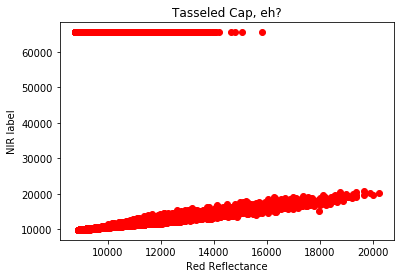

In [24]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

Text(0.5, 1.0, 'Tasseled Cap, eh?')

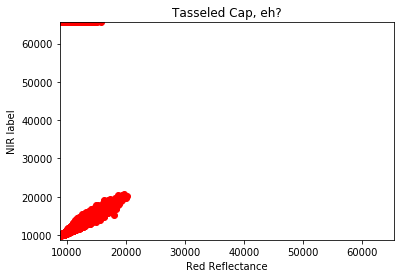

In [25]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Calculate min and max
plot_min = min(red.min(), nir.min())
plot_max = max(red.max(), nir.max())

plt.xlim((plot_min, plot_max))
plt.ylim((plot_min, plot_max))

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

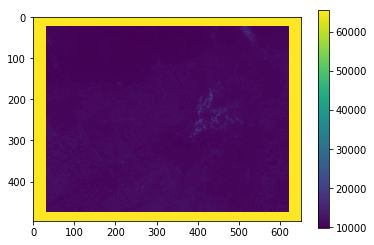

In [26]:
plt.imshow(image[:, :, 3])
plt.colorbar()

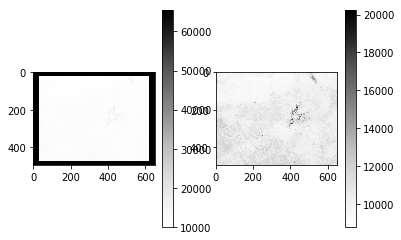

In [27]:
# use "imshow" for an image -- nir in first subplot, red in second
plt.subplot(121)
plt.imshow(image[:, :, 3], cmap=plt.cm.Greys)
plt.colorbar()

# Now red band in the second subplot (indicated by last of the 3 numbers)
plt.subplot(122)
plt.imshow(image[:, :, 2], cmap=plt.cm.Greys)
plt.colorbar()

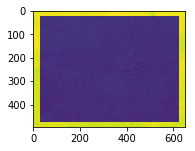

In [28]:
plt.subplot(121)
plt.imshow(ndvi)

In [31]:
# Import Python 3 print function
from __future__ import print_function

# Import OGR - 
from osgeo import ogr

# Open the dataset from the file
dataset = ogr.Open('E:Raw//DATA//gadm36_PAK_shp//gadm36_PAK_2.shp')
# Make sure the dataset exists -- it would be None if we couldn't open it
if not dataset:
    print('Error: could not open dataset')

In [32]:
### Let's get the driver from this file
driver = dataset.GetDriver()
print('Dataset driver is: {n}\n'.format(n=driver.name))

Dataset driver is: ESRI Shapefile



In [33]:
# How many layers contain in shapefile
layers = dataset.GetLayerCount()
print('Number of layers = {n}\n'.format(n=layers))

Number of layers = 1



In [34]:
### What is the name of the 1 layer?
layer = dataset.GetLayerByIndex(0)
print('The layer is named: {n}\n'.format(n=layer.GetName()))

The layer is named: gadm36_PAK_2



In [37]:
geometry = layer.GetGeomType()

In [38]:
# So we need to translate it to the name of the enum
geometry_name = ogr.GeometryTypeToName(geometry)
print("The layer's geometry is: {geom}\n".format(geom=geometry_name))

The layer's geometry is: Polygon



In [39]:
# Get the spatial reference
spatial_ref = layer.GetSpatialRef()

In [40]:
# Export this spatial reference to something we can read... like the Proj4
proj4 = spatial_ref.ExportToProj4()
print('Layer projection is: {proj4}\n'.format(proj4=proj4))

Layer projection is: +proj=longlat +datum=WGS84 +no_defs 



In [41]:
### How many features are in the layer?
feature_count = layer.GetFeatureCount()
print('Layer has {n} features\n'.format(n=feature_count))

Layer has 32 features



In [42]:
### How many fields are in the shapefile, and what are their names?
# First we need to capture the layer definition
defn = layer.GetLayerDefn()

In [43]:
# How many fields
field_count = defn.GetFieldCount()
print('Layer has {n} fields'.format(n=field_count))

Layer has 13 fields


In [44]:
# What are their names?
print('Their names are: ')
for i in range(field_count):
    field_defn = defn.GetFieldDefn(i)
    print('\t{name} - {datatype}'.format(name=field_defn.GetName(),
                                         datatype=field_defn.GetTypeName()))

Their names are: 
	GID_0 - String
	NAME_0 - String
	GID_1 - String
	NAME_1 - String
	NL_NAME_1 - String
	GID_2 - String
	NAME_2 - String
	VARNAME_2 - String
	NL_NAME_2 - String
	TYPE_2 - String
	ENGTYPE_2 - String
	CC_2 - String
	HASC_2 - String


In [49]:

%%bash

# Print out the usage
gdal_rasterize --help

UsageError: Line magic function `%%bash` not found.


In [4]:
#z = range (10)
for num in range(11):
    print(num)

0
1
2
3
4
5
6
7
8
9
10


In [9]:
z=5

r = range(11)
for num in r:
    x=z*num
    print(x)

0
5
10
15
20
25
30
35
40
45
50
